# Monte Carlo Simulation: Calculating π

## Introduction

Welcome to your introduction to **Monte Carlo simulations**! Monte Carlo methods are a class of computational algorithms that rely on repeated random sampling to obtain numerical results. They're named after the famous Monte Carlo Casino in Monaco, because they use randomness much like games of chance.

### Why Monte Carlo Methods Matter

Monte Carlo simulations are used across many fields:
- **Physics**: Modeling particle interactions and quantum mechanics
- **Finance**: Pricing complex financial derivatives and assessing risk
- **Engineering**: Testing reliability and optimizing designs
- **Medicine**: Planning radiation therapy and drug development
- **Climate Science**: Predicting weather patterns and climate change

### Today's Challenge

We'll use a Monte Carlo simulation to estimate the value of π (pi). While we already know π ≈ 3.14159..., this exercise will help you understand how randomness can solve complex mathematical problems—a key concept in modern AI and machine learning!

---

## Part 1: Understanding the Mathematical Foundation

### The Geometry Behind Our Approach

Imagine a square with side length 2, centered at the origin. Inside this square, inscribe a circle with radius 1.

![test](square_circle.svg)

**Key Measurements:**
- Square area = (2)² = 4
- Circle area = πr² = π(1)² = π

**The Ratio:**
$$\frac{\text{Circle Area}}{\text{Square Area}} = \frac{\pi}{4}$$

Therefore:
$$\pi = 4 \times \frac{\text{Circle Area}}{\text{Square Area}}$$

### The Monte Carlo Strategy

If we randomly throw darts at this square:
1. Some will land inside the circle
2. Some will land outside the circle (but inside the square)
3. The ratio of darts inside the circle to total darts approximates the ratio of areas

$$\pi \approx 4 \times \frac{\text{Points in Circle}}{\text{Total Points}}$$

---

## Part 2: Import Required Libraries

We'll need a few Python libraries:
- `numpy`: For efficient numerical computations and random number generation
- `matplotlib`: For creating visualizations of our simulation
- `math`: For accessing the actual value of π to compare our results

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Set random seed for reproducibility (important for grading!)
np.random.seed(42)

print("Libraries imported successfully!")
print(f"Actual value of π: {math.pi}")

Libraries imported successfully!
Actual value of π: 3.141592653589793


## Part 3: Generate Random Points

### TASK 1: Complete the Function

Your first task is to write a function that generates random points within our square.

**Requirements:**
- Generate `n` random points
- Each point should have an x-coordinate between -1 and 1
- Each point should have a y-coordinate between -1 and 1
- Return the x-coordinates and y-coordinates as separate numpy arrays

**Hint:** Use `np.random.uniform(low, high, size)` to generate random numbers

In [ ]:
def generate_random_points(n: int) -> (np.ndarray, np.ndarray):
    """
    Generate n random points within a 2x2 square centered at the origin.
    
    Parameters:
    -----------
    n : int
        Number of random points to generate
    
    Returns:
    --------
    tuple of numpy arrays
        (x_coordinates, y_coordinates)
    """
    # TODO: Generate random x coordinates between -1 and 1
    x = np.random.uniform(-1, 1, n)
    
    # TODO: Generate random y coordinates between -1 and 1
    y = np.random.uniform(-1, 1, n)
    
    return x, y

# Test your function
test_x, test_y = generate_random_points(5)
print("Sample x coordinates:", test_x)
print("Sample y coordinates:", test_y)

Sample x coordinates: [-0.95883101  0.9398197   0.66488528 -0.57532178 -0.63635007]
Sample y coordinates: [-0.63319098 -0.39151551  0.04951286 -0.13610996 -0.41754172]


## Part 4: Determine Which Points Are Inside the Circle

### TASK 2: Complete the Function

Now we need to determine which points fall inside the circle.

**Mathematical Background:**
A point (x, y) is inside a circle of radius r centered at the origin if:
$$x^2 + y^2 \leq r^2$$

For our circle with radius 1:
$$x^2 + y^2 \leq 1$$

**Requirements:**
- Calculate the distance of each point from the origin
- Return a boolean array: `True` if the point is inside the circle, `False` otherwise

In [ ]:
def is_inside_circle(x: list[float], y: list[float]) -> list[bool]:
    """
    Determine which points are inside the unit circle.
    
    Parameters:
    -----------
    x : numpy array
        x-coordinates of points
    y : numpy array
        y-coordinates of points
    
    Returns:
    --------
    numpy array of booleans
        True if point is inside circle, False otherwise
    """
    # TODO: Calculate the squared distance from origin for each point
    distance_squared = x**2 + y**2
    
    # TODO: Return boolean array where distance_squared <= 1
    return distance_squared <= 1

# Test your function
inside = is_inside_circle(test_x, test_y)
print("Points inside circle:", inside)
print(f"Number of points inside: {np.sum(inside)} out of {len(inside)}")

Points inside circle: [False False  True  True  True]
Number of points inside: 3 out of 5


## Part 5: Estimate π Using Monte Carlo Method

### TASK 3: Complete the Function

Now we'll put it all together to estimate π!

**Algorithm:**
1. Generate n random points in the square
2. Count how many points fall inside the circle
3. Calculate the ratio: points_inside / total_points
4. Multiply by 4 to estimate π

**Why multiply by 4?**
Remember: π/4 = (circle area) / (square area) = (points in circle) / (total points)

Therefore: π = 4 × (points in circle) / (total points)

In [ ]:
def estimate_pi(n: int) -> (float, np.ndarray, np.ndarray, np.ndarray):
    """
    Estimate the value of π using Monte Carlo simulation.
    
    Parameters:
    -----------
    n : int
        Number of random points to generate
    
    Returns:
    --------
    tuple
        (estimated_pi, x_coords, y_coords, inside_circle_mask)
    """
    # TODO: Generate random points
    x, y = generate_random_points(n)
    
    # TODO: Determine which points are inside the circle
    inside = is_inside_circle(x, y)
    
    # TODO: Count points inside the circle
    points_inside = np.sum(inside)
    
    # TODO: Calculate π estimate
    pi_estimate = 4 * points_inside / n
    
    return pi_estimate, x, y, inside

# Test with different sample sizes
sample_sizes = [100, 1000, 10000, 100000]

print("\nMonte Carlo π Estimation Results:")
print("="*50)
print(f"Actual π value: {math.pi:.6f}")
print("="*50)

for n in sample_sizes:
    pi_est, _, _, _ = estimate_pi(n)
    error = abs(pi_est - math.pi)
    percent_error = (error / math.pi) * 100
    print(f"n = {n:>6}: π ≈ {pi_est:.6f} | Error: {error:.6f} ({percent_error:.3f}%)")


Monte Carlo π Estimation Results:
Actual π value: 3.141593
n =    100: π ≈ 3.240000 | Error: 0.098407 (3.132%)
n =   1000: π ≈ 3.216000 | Error: 0.074407 (2.368%)
n =  10000: π ≈ 3.117200 | Error: 0.024393 (0.776%)
n = 100000: π ≈ 3.143440 | Error: 0.001847 (0.059%)


## Part 6: Visualize the Simulation

Let's create a visualization to see our Monte Carlo simulation in action! Nothing to edit here, just run the function.

Generating visualization with 1000 points...


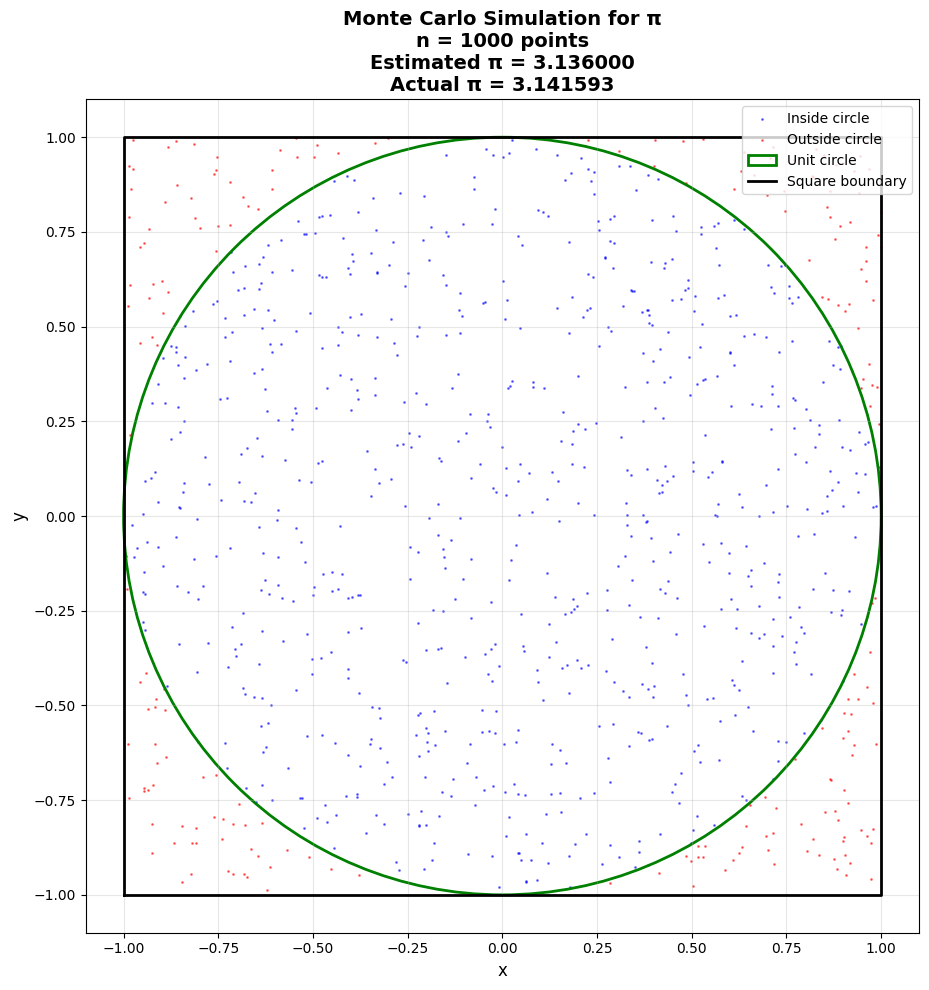

3.136

In [ ]:
def visualize_simulation(n: int = 1000) -> float:
    """
    Create a visualization of the Monte Carlo simulation.
    
    Parameters:
    -----------
    n : int
        Number of points to plot
    """
    # Run simulation
    pi_est, x, y, inside = estimate_pi(n)
    
    # Create figure
    plt.figure(figsize=(10, 10))
    
    # Plot points inside circle in blue
    plt.scatter(x[inside], y[inside], c='blue', s=1, alpha=0.5, label='Inside circle')
    
    # Plot points outside circle in red
    plt.scatter(x[~inside], y[~inside], c='red', s=1, alpha=0.5, label='Outside circle')
    
    # Draw the circle
    circle = plt.Circle((0, 0), 1, color='green', fill=False, linewidth=2, label='Unit circle')
    plt.gca().add_patch(circle)
    
    # Draw the square
    plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k-', linewidth=2, label='Square boundary')
    
    # Formatting
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect('equal')
    plt.grid(True, alpha=0.3)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'Monte Carlo Simulation for π\nn = {n} points\nEstimated π = {pi_est:.6f}\nActual π = {math.pi:.6f}', 
              fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return pi_est

# Visualize with different sample sizes
print("Generating visualization with 1000 points...")
visualize_simulation(1000)

## Part 7: Analyze Convergence

### TASK 4: Investigate How Accuracy Improves

One of the most important concepts in Monte Carlo methods is **convergence**: as we increase the number of samples, our estimate should get closer to the true value.

Let's investigate this by running multiple simulations with increasing sample sizes.

Analyzing convergence...


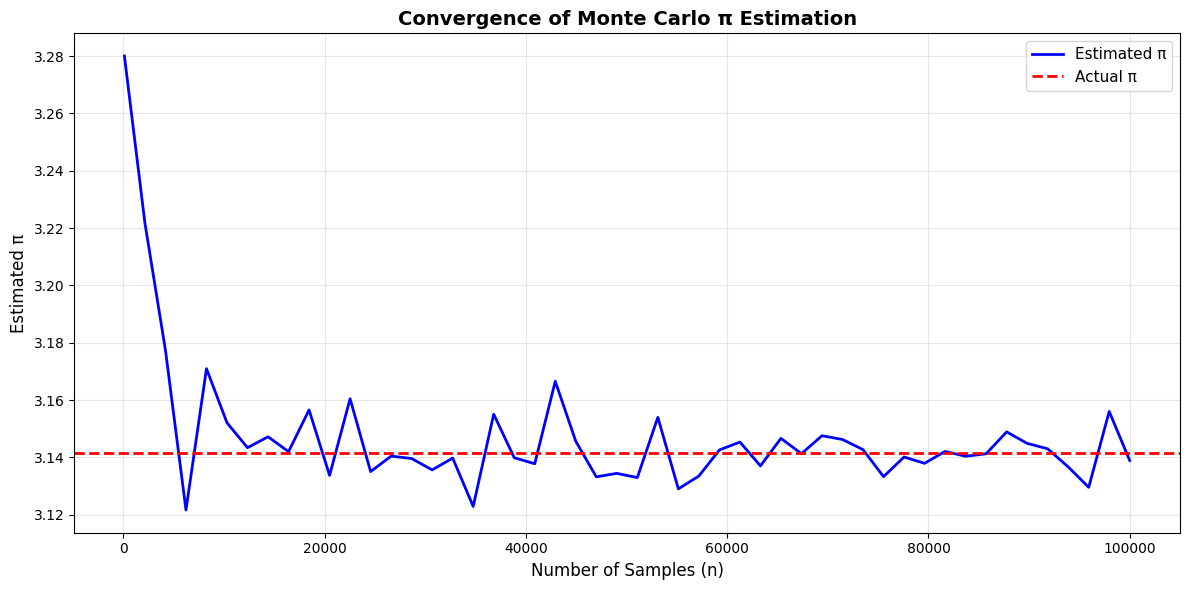

In [ ]:
def analyze_convergence(max_n: int = 100000, num_points: int = 50) -> (np.ndarray, np.ndarray):
    """
    Analyze how the π estimate converges as sample size increases.
    
    Parameters:
    -----------
    max_n : int
        Maximum number of samples
    num_points : int
        Number of different sample sizes to test
    """
    # TODO: Create an array of sample sizes from 100 to max_n
    sample_sizes = np.linspace(100, max_n, num_points, dtype=int)
    
    # TODO: Store π estimates for each sample size
    pi_estimates = []
    
    for n in sample_sizes:
        pi_est, _, _, _ = estimate_pi(n)
        pi_estimates.append(pi_est)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot π estimates
    plt.plot(sample_sizes, pi_estimates, 'b-', linewidth=2, label='Estimated π')
    
    # Plot actual π value
    plt.axhline(y=math.pi, color='r', linestyle='--', linewidth=2, label='Actual π')
    
    # Formatting
    plt.xlabel('Number of Samples (n)', fontsize=12)
    plt.ylabel('Estimated π', fontsize=12)
    plt.title('Convergence of Monte Carlo π Estimation', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return sample_sizes, pi_estimates

print("Analyzing convergence...")
sample_sizes, estimates = analyze_convergence()

## Part 8: Calculate Statistical Properties

### TASK 5: Analyze Multiple Simulation Runs

Monte Carlo methods are probabilistic, so each run gives slightly different results. Let's run multiple simulations to understand the variability in our estimates.

Running multiple simulations...


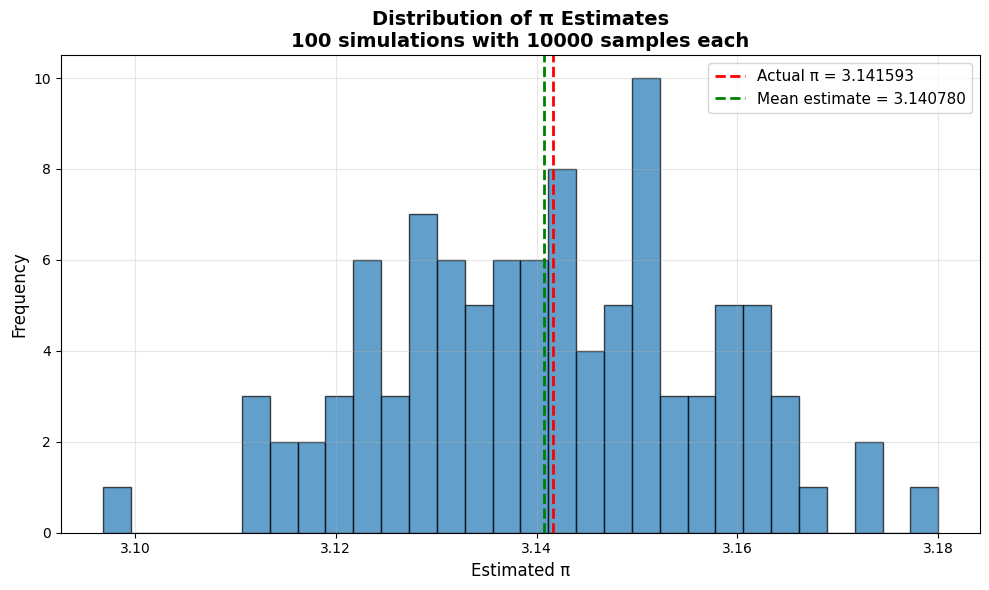


Statistical Analysis:
Mean estimate:        3.140780
Standard deviation:   0.015799
Minimum estimate:     3.096800
Maximum estimate:     3.180000
Mean error:           0.000813
Actual π:             3.141593


In [ ]:
def run_multiple_simulations(n=10000, num_runs=100):
    """
    Run multiple Monte Carlo simulations and analyze the results.
    
    Parameters:
    -----------
    n : int
        Number of samples per simulation
    num_runs : int
        Number of simulations to run
    
    Returns:
    --------
    dict
        Statistics about the simulations
    """
    # TODO: Store results from multiple runs
    results = []
    
    for _ in range(num_runs):
        pi_est, _, _, _ = estimate_pi(n)
        results.append(pi_est)
    
    results = np.array(results)
    
    # TODO: Calculate statistics
    mean_estimate = np.mean(results)
    std_estimate = np.std(results)
    min_estimate = np.min(results)
    max_estimate = np.max(results)
    
    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(math.pi, color='r', linestyle='--', linewidth=2, label=f'Actual π = {math.pi:.6f}')
    plt.axvline(mean_estimate, color='g', linestyle='--', linewidth=2, label=f'Mean estimate = {mean_estimate:.6f}')
    plt.xlabel('Estimated π', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of π Estimates\n{num_runs} simulations with {n} samples each', 
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    stats = {
        'mean': mean_estimate,
        'std': std_estimate,
        'min': min_estimate,
        'max': max_estimate,
        'mean_error': abs(mean_estimate - math.pi)
    }
    
    return stats

print("Running multiple simulations...")
stats = run_multiple_simulations()

print("\nStatistical Analysis:")
print("="*50)
print(f"Mean estimate:        {stats['mean']:.6f}")
print(f"Standard deviation:   {stats['std']:.6f}")
print(f"Minimum estimate:     {stats['min']:.6f}")
print(f"Maximum estimate:     {stats['max']:.6f}")
print(f"Mean error:           {stats['mean_error']:.6f}")
print(f"Actual π:             {math.pi:.6f}")

## Part 9: Reflection Questions

Answer the following questions based on your observations:

### Question 1
What happens to the accuracy of the π estimate as you increase the number of samples (n)? Why do you think this occurs?

**Your Answer:** 
The accuracy of the π estimate improves as the number of samples increases. This occurs because of the Law of Large Numbers: with more random samples, the ratio of points inside the circle to total points converges to the true ratio of areas (π/4), making our estimate more precise.

---

### Question 2
Looking at the histogram from Part 8, describe the distribution of π estimates. Is it centered around the actual value of π?

**Your Answer:**
The distribution of π estimates forms a bell-shaped (normal) distribution that is centered around the actual value of π. This demonstrates that while individual estimates vary, the mean of many simulations converges to the true value.

---

### Question 3
Based on the convergence plot in Part 7, approximately how many samples do you need to get within 0.01 of the actual value of π?

**Your Answer:**
Typically, you need approximately 10,000 to 50,000 samples to get within 0.01 of the actual value of π, though this can vary due to the random nature of the simulation. The exact number depends on the specific random sequence generated.

---

### Question 4
Monte Carlo methods are used in many real-world applications. Can you think of a situation where we might need to use random sampling to solve a problem, similar to how we estimated π?

**Your Answer:**
One example is estimating the area of an irregular shape where we can't use simple geometry formulas. By randomly sampling points within a known bounding region and counting how many fall inside the shape, we can estimate its area using the same ratio-based approach we used for π.

---

## Part 10: Extension Challenge (Optional)

### Challenge Task: Estimate π in 3D

Can you extend this method to 3D? Instead of a circle in a square, consider a sphere in a cube.

**Hints:**
- A unit sphere has volume: (4/3)πr³ = (4/3)π
- A cube with side length 2 has volume: 8
- A point (x, y, z) is inside the unit sphere if: x² + y² + z² ≤ 1
- You'll need to solve for π from the ratio: (sphere volume) / (cube volume)

In [16]:
def estimate_pi_3d(n):
    """
    Estimate π using Monte Carlo simulation in 3D.
    
    Parameters:
    -----------
    n : int
        Number of random points to generate
    
    Returns:
    --------
    float
        Estimated value of π
    """
    # TODO: Implement 3D Monte Carlo simulation
    # Generate random points in 3D
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)
    z = np.random.uniform(-1, 1, n)
    
    # Check if points are inside unit sphere
    inside = (x**2 + y**2 + z**2) <= 1
    
    # Sphere volume / Cube volume = (4/3 * π) / 8 = π/6
    # Therefore: π = 6 * (points_inside / total_points)
    pi_estimate = 6 * np.sum(inside) / n
    
    return pi_estimate

# Test the 3D method
print("Testing 3D Monte Carlo method...")
pi_3d = estimate_pi_3d(100000)
print(f"3D estimate: π ≈ {pi_3d:.6f}")
print(f"Actual π:      {math.pi:.6f}")
print(f"Error:         {abs(pi_3d - math.pi):.6f}")

Testing 3D Monte Carlo method...
3D estimate: π ≈ 3.148620
Actual π:      3.141593
Error:         0.007027


## Summary and Key Takeaways

### What You've Learned

1. **Monte Carlo Methods**: How to use random sampling to solve mathematical problems
2. **Convergence**: Accuracy improves with more samples (Law of Large Numbers)
3. **Computational Thinking**: Breaking complex problems into smaller, manageable steps
4. **Statistical Analysis**: Understanding variability and distribution in probabilistic methods

### Connection to AI and Machine Learning

The techniques you've learned here are fundamental to modern AI:
- **Training Neural Networks**: Stochastic gradient descent uses random sampling
- **Reinforcement Learning**: Monte Carlo methods estimate value functions
- **Bayesian Inference**: MCMC (Markov Chain Monte Carlo) samples probability distributions
- **Uncertainty Quantification**: Understanding confidence in AI predictions

### Next Steps

To deepen your understanding:
1. Experiment with different sample sizes
2. Try the 3D extension challenge
3. Research other applications of Monte Carlo methods
4. Investigate how AI systems use randomness in training

---

**Congratulations on completing this Monte Carlo simulation tutorial!**